In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
from tqdm import trange

In [2]:
sys.path.append('/home/raffaele/Documents/ml-project/src/')

In [3]:
from torch_utility import *

In [4]:
data = np.genfromtxt('/home/raffaele/Documents/ml-project/cup/ML-CUP20-TR.csv', delimiter=',', dtype=np.float64)
X = data[:, 1:-2]
y = data[:, -2:]

In [5]:
print(X.shape)
print(y.shape)

(1524, 10)
(1524, 2)


In [6]:
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.20, random_state=42)

### Split train set and Validation Set

In [7]:
Xtrain = Xtrain.astype('float32')
ytrain = ytrain.astype('float32')

Xval = Xval.astype('float32')
yval = yval.astype('float32')

## Define Models

In [8]:
class Net(nn.Module):

    def __init__(self, num_units1, num_units2):
        super(Net, self).__init__()
        self.input_layer = nn.Linear(10,num_units1)
        self.hidden1 = nn.Linear(num_units1, num_units2)
        self.output = nn.Linear(num_units2, 1)

    def forward(self, x):
        x = torch.tanh(self.input_layer(x))
        x = torch.tanh(self.hidden1(x))
        x = self.output(x)
        return x

In [9]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.0)

In [10]:
class MEE(torch.nn.Module):

    def __init__(self):
        super(MEE, self).__init__()

    def forward(self, y_true, y_pred):
#         return torch.mean(torch.linalg.norm(y_pred - y_true))
#         return torch.mean(torch.cdist(y_true, y_pred, p=2))
#         return torch.div(torch.sum(torch.pairwise_distance(y_true, y_pred)), len(y_true))
        return torch.mean(torch.linalg.norm(y_true - y_pred, axis=1))
#         return torch.div(torch.linalg.norm(y_pred - y_true, ord=None), len(y_true))
#         return torch.div(torch.linalg.norm(y_pred - y_true), len(y_true))

In [11]:
from sklearn.metrics import euclidean_distances

def mean_euclidean_error(y_true, y_pred):
    assert y_true.shape == y_pred.shape
#     return np.mean(np.linalg.norm(y_pred - y_true))
#     return np.divide(np.linalg.norm(y - y_real), len(y_real))
#     return np.mean(euclidean_distances(y_true, y_pred))
    return np.mean(np.linalg.norm(y_true - y_pred, axis=1)) #utilizzare questa loss la prossima grid

In [12]:
ytrain1 = ytrain[:,0]
ytrain2 = ytrain[:,1]

In [13]:
ytrain1 = ytrain1.reshape(ytrain1.shape[0], 1)
ytrain2 = ytrain2.reshape(ytrain2.shape[0], 1)

In [31]:
from skorch import NeuralNetRegressor
test_net1 = Net(20,10)
# test_net1.apply(init_weights)
nett1 = NeuralNetRegressor(test_net1, max_epochs=300,
                          lr=0.01,
                          batch_size=64,
                          optimizer=optim.SGD,
                          optimizer__momentum=0.8,
                          optimizer__weight_decay=0.0001,
                          optimizer__nesterov = True,
                          criterion=MEE)
# Training
nett1.fit(Xtrain, ytrain1)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1       48.6404       46.5343  0.0436
      2       46.7824       43.6384  0.0413
      3       42.4935       37.4765  0.0410
      4       35.2428       29.3425  0.0394
      5       26.8025       20.6589  0.0410
      6       18.9361       15.2965  0.0418
      7       15.3428       12.5193  0.0395
      8       12.3170       11.3177  0.0383
      9       10.1365        8.3252  0.0417
     10        8.4000        7.3700  0.0420
     11        7.4198        6.5224  0.0399
     12        6.4569        5.6712  0.0386
     13        5.5787        5.2352  0.0413
     14        4.9206        4.4158  0.0395
     15        4.3892        4.2937  0.0397
     16        3.9468        3.5711  0.0391
     17        3.5727        3.5814  0.0400
     18        3.3131        2.9599  0.0404
     19        3.0303        3.0055  0.0410
     20        2.8209        2.9862  0.0403
     21        2.6392        2.6

    164        1.3989        1.8273  0.0405
    165        1.3815        1.9197  0.0408
    166        1.3886        1.8898  0.0377
    167        1.3974        1.8881  0.0377
    168        1.3598        1.8761  0.0401
    169        1.3952        1.8500  0.0378
    170        1.3547        2.0516  0.0382
    171        1.3645        2.1404  0.0385
    172        1.4031        2.0823  0.0465
    173        1.3700        2.0578  0.0392
    174        1.3837        1.8706  0.0400
    175        1.3688        1.9458  0.0395
    176        1.4032        1.9667  0.0395
    177        1.3555        1.9971  0.0403
    178        1.3711        1.8335  0.0374
    179        1.3708        1.8884  0.0380
    180        1.3473        1.9794  0.0377
    181        1.3699        2.2296  0.0392
    182        1.3730        1.9861  0.0380
    183        1.3485        2.0988  0.0380
    184        1.3740        1.8557  0.0391
    185        1.3734        1.9031  0.0397
    186        1.3540        1.9

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=Net(
    (input_layer): Linear(in_features=10, out_features=20, bias=True)
    (hidden1): Linear(in_features=20, out_features=10, bias=True)
    (output): Linear(in_features=10, out_features=1, bias=True)
  ),
)

In [32]:
from skorch import NeuralNetRegressor
test_net2 = Net(20,10)
# test_net2.apply(init_weights)
nett2 = NeuralNetRegressor(test_net2, max_epochs=300,
                          lr=0.01,
                          batch_size=128,
                          optimizer=optim.SGD,
                          optimizer__momentum=0.8,
#                           optimizer__weight_decay=0.0001,
                          optimizer__nesterov = True,
                          criterion=MEE)
# Training
nett2.fit(Xtrain, ytrain2)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1       28.4561       27.3185  0.0434
      2       27.7962       26.4630  0.0584
      3       26.7610       25.1262  0.0359
      4       25.1215       23.0485  0.0352
      5       22.7779       20.5262  0.0340
      6       20.1774       18.0641  0.0444
      7       17.7030       15.7461  0.0685
      8       15.4561       13.7089  0.0498
      9       13.4358       11.7989  0.0501
     10       11.3876        9.5414  0.0530
     11        9.1093        7.3435  0.0478
     12        7.1509        5.7389  0.0508
     13        5.7827        4.7779  0.0572
     14        4.9276        4.1590  0.0546
     15        4.4601        3.8322  0.0555
     16        4.1936        3.6748  0.0551
     17        4.0203        3.5548  0.0606
     18        3.7923        3.2739  0.0523
     19        3.4510        3.0908  0.0648
     20        3.1372        2.9460  0.0586
     21        2.9445        2.8

    156        1.7209        2.2494  0.0585
    157        1.7173        2.2822  0.0453
    158        1.7097        2.2848  0.0443
    159        1.7087        2.2827  0.0448
    160        1.7045        2.2887  0.0487
    161        1.7106        2.2949  0.0435
    162        1.7131        2.3121  0.0466
    163        1.7085        2.3274  0.0407
    164        1.7092        2.2846  0.0417
    165        1.7022        2.2960  0.0590
    166        1.6937        2.2774  0.0387
    167        1.6986        2.3530  0.0460
    168        1.7056        2.2897  0.0462
    169        1.6963        2.3501  0.0487
    170        1.6960        2.2975  0.0586
    171        1.6936        2.3099  0.0591
    172        1.6906        2.3397  0.0469
    173        1.6902        2.3083  0.0539
    174        1.6864        2.3139  0.0436
    175        1.6789        2.3022  0.0410
    176        1.6835        2.3353  0.0403
    177        1.6786        2.3150  0.0381
    178        1.6842        2.3

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=Net(
    (input_layer): Linear(in_features=10, out_features=20, bias=True)
    (hidden1): Linear(in_features=20, out_features=10, bias=True)
    (output): Linear(in_features=10, out_features=1, bias=True)
  ),
)

In [33]:
prova1 = nett1.predict(Xval)
prova2 = nett2.predict(Xval)

In [34]:
pr = np.append(prova1, prova2, axis=1)

In [35]:
mean_euclidean_error(pr, yval)

3.5971928

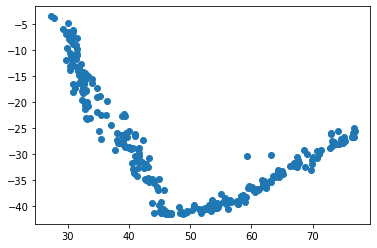

In [36]:
plt.scatter(pr[:,0], pr[:,1])